# Pair Programming EDA

Objetivos
- Buscar un conjunto de datos a analizar. Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable as stb


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv ('datos/travel_insurance.csv')

In [3]:
df.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
36292,C2B,Airlines,Online,Silver Plan,No,27,SINGAPORE,24.5,6.13,M,35
40930,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,38,AUSTRALIA,138.6,83.16,NaN,46
5267,EPX,Travel Agency,Online,Cancellation Plan,No,53,UNITED STATES,70.0,0.00,NaN,50
37979,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,14,JAPAN,41.0,0.00,NaN,36
45385,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,9,VIET NAM,25.0,0.00,NaN,36


In [4]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

Descripción de columnas:

- Target: Claim Status (Claim.Status)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- Commission received for travel insurance agency (Commission)
- Gender of insured (Gender)
- Age of insured (Age)

La variable respuesta será la columna 'Claim' que muestra si el seguro ha sido reclamado. Hacemos un recuento y nos sale que hay 921 reclamados frente a 54363 que no han reclamado.

In [5]:
df.Claim.value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Vemos que hay nulos en la columna 'gender', nos ocuparemos de ellos cuando exploremos las variables categóricas.

Miramos cuantos duplicados tenemos y comprobamos qué porcentaje representa de nuestro dataset. Los eliminamos

In [8]:
df.duplicated().sum()

8042

In [9]:
(df.duplicated().sum()*100)/df.shape[0]

12.69936518965354

In [10]:
df.shape

(63326, 11)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,55284.000000,55284.000000,55284.000000,55284.000000
mean,52.715035,42.788716,10.680707,39.977932
std,106.413615,50.448570,20.676708,13.509125
min,-2.000000,-389.000000,0.000000,0.000000
25%,11.000000,19.167500,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.500000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


- Net Sales: Vemos en el cuadro anterior que hay numeros negativos en la columna Net Sales, lo cual es imposible ya que esa columna hace referencia al precio del seguro y no puede ser ni un numero negativo ni menor que la comisión.

- Duration: hemos visto también que hay valores negativos en la columna duration y es imposible que un viaje dure un tiempo negativo. Y en el otro extremo, el máximo de duration es de 4881 dias, es imposible que un seguro de viaje dure 13 años.

- Age: también nos llama la atención que la edad máxima de un asegurado sea de 118 años. 

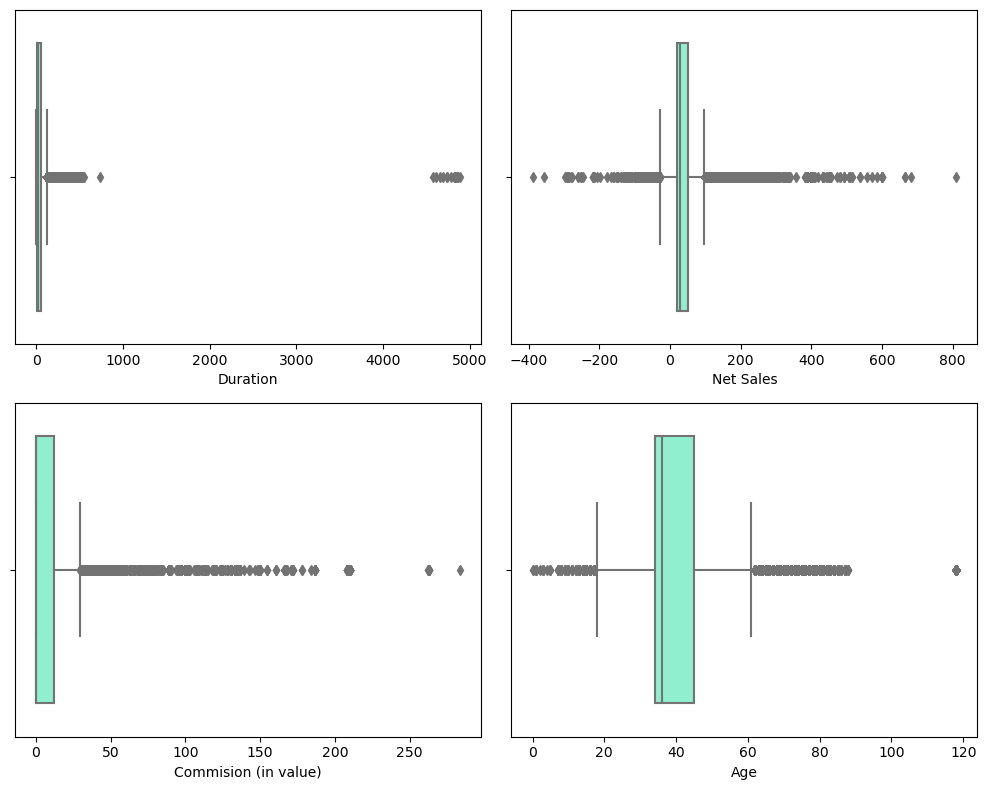

In [14]:
numericas=df.select_dtypes(include= np.number)

fig, axes = plt.subplots(2,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 
    
plt.tight_layout()

plt.show()

Tras comprobar visualmente los outlier, empezamos con la limpieza.
- NetSales: eliminamos todos los registros en los que el valor de NetSales sea negativo.

- Duration: eliminamos todos los registros cuya cantidad sea mayor de 30 dias, ya que es el máximo de días permitido en la mayoria de los seguros de viaje. También los de menos de 1 dia.

- Commision: eliminamos todos los registros cuya cantidad sea mayor que la de NetSales.

- Age: eliminamos todos los registros de más de 100 años.

In [15]:
df2= df[(df['Net Sales']>0) & (df['Duration']>1) & (df['Duration']<30) & (df['Commision (in value)']< df['Net Sales']) & (df['Age']<100)]

Volvemos a ver nuestras variables numericas en graficas.

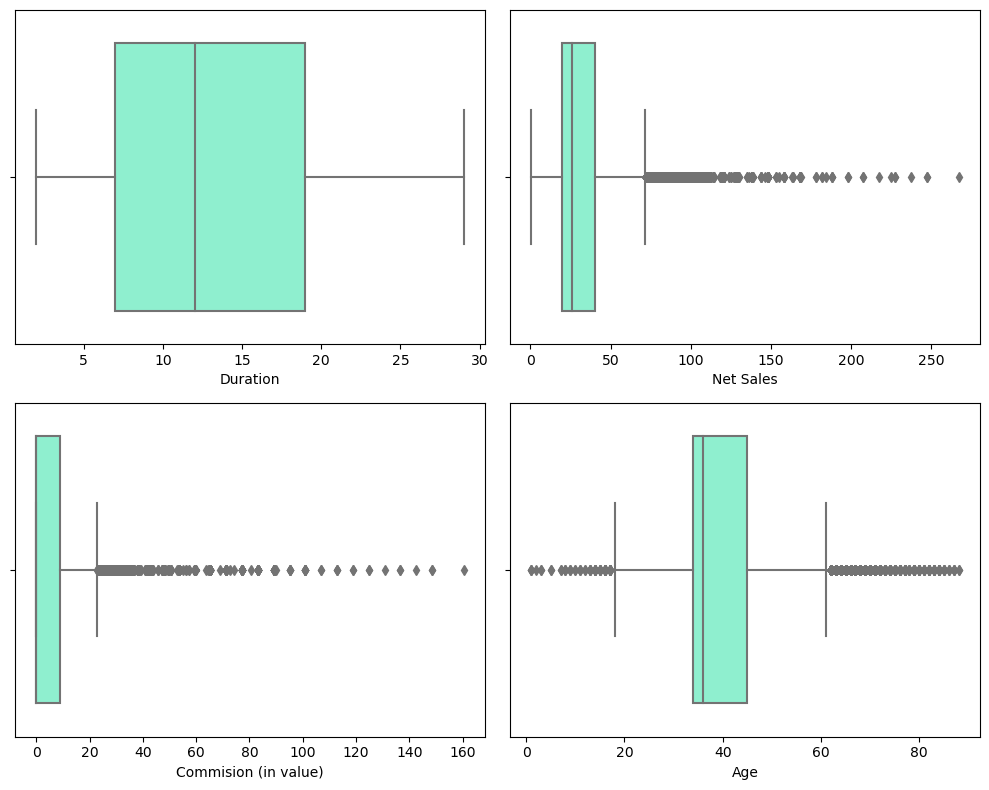

In [16]:
numericas2=df2.select_dtypes(include=np.number)
fig, axes = plt.subplots(2,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df2, ax=axes[indice], color = "aquamarine"); 
    
plt.tight_layout()
#fig.delaxes(axes[-1])

plt.show()

Hacemos un countplot de la variable respuesta.

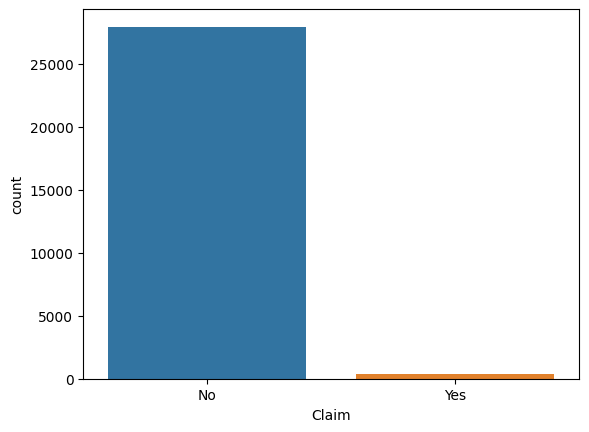

In [17]:
sns.countplot (data=df2, x='Claim' );

Como hay mucho desequilibrio, vamos a explorar los registros reclamados para ver si podemos balancear de manera natural, aunque nos adelantemos al siguiente pair programmig.

In [18]:
df3= df2[df2['Claim']=='Yes']

In [19]:
df3.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
248,C2B,Airlines,Online,Silver Plan,Yes,10,SINGAPORE,43.55,10.89,M,45
419,C2B,Airlines,Online,Silver Plan,Yes,11,SINGAPORE,62.25,15.56,M,33
462,EPX,Travel Agency,Online,2 way Comprehensive Plan,Yes,9,CHINA,87.00,0.00,NaN,36
601,C2B,Airlines,Online,Silver Plan,Yes,16,SINGAPORE,74.25,18.56,M,27


In [20]:
df3.shape

(391, 11)

In [21]:
df3.value_counts()

Agency  Agency Type    Distribution Channel  Product Name           Claim  Duration  Destination  Net Sales  Commision (in value)  Gender  Age
C2B     Airlines       Online                Bronze Plan            Yes    2         SINGAPORE    13.5       3.38                  M       37     1
                                             Silver Plan            Yes    12        SINGAPORE    48.5       12.13                 F       31     1
                                                                           13        SINGAPORE    54.5       13.63                 M       34     1
                                                                                                                                           25     1
                                                                                                                                   F       32     1
                                                                                                                     

In [22]:
df3.Agency.unique()

array(['C2B', 'EPX', 'CWT', 'JZI', 'SSI', 'KML', 'RAB', 'LWC', 'CCR',
       'TST'], dtype=object)

In [23]:
df3['Agency Type'].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [24]:
df3['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [25]:
df3.stb.freq (['Distribution Channel'], style=True )

,Distribution Channel,count,percent,cumulative_count,cumulative_percent
0,Online,386,98.72%,386,98.72%
1,Offline,5,1.28%,391,100.00%


Vemos que la mayoria de seguros reclamados vienen de la venta online. Como tenemos tanto desequilibrio en  nuestros datos, eliminamos todos los NO reclamados que proceden de la venta. Aplicamos nuestro filtro sobre df2 que es df original limpio, lo llamamos df global para evitar confusiones.

In [26]:
df_global = df2[df2['Distribution Channel']=='Online']

Hacemos un Value count para ver cómo esta el desequilibrio.

In [27]:
df_global['Claim'].value_counts()

No     27608
Yes      386
Name: Claim, dtype: int64

Exploramos las edades de los clientes que reclaman y vemos 

In [28]:
df3.stb.freq (['Age'], style=True, thresh=60)

,Age,count,percent,cumulative_count,cumulative_percent
0,36.000000,63,16.11%,63,16.11%
1,30.000000,24,6.14%,87,22.25%
2,28.000000,19,4.86%,106,27.11%
3,31.000000,18,4.60%,124,31.71%
4,32.000000,17,4.35%,141,36.06%
5,26.000000,17,4.35%,158,40.41%
6,35.000000,14,3.58%,172,43.99%
7,27.000000,13,3.32%,185,47.31%
8,34.000000,12,3.07%,197,50.38%
9,37.000000,11,2.81%,208,53.20%


Echamos un vistazo a los destinos del dataset global y solo para los que reclamados.

In [29]:
df3.stb.freq (['Destination'], style=True )

,Destination,count,percent,cumulative_count,cumulative_percent
0,SINGAPORE,243,62.15%,243,62.15%
1,CHINA,22,5.63%,265,67.77%
2,MALAYSIA,19,4.86%,284,72.63%
3,AUSTRALIA,17,4.35%,301,76.98%
4,THAILAND,15,3.84%,316,80.82%
5,INDONESIA,9,2.30%,325,83.12%
6,VIET NAM,8,2.05%,333,85.17%
7,HONG KONG,8,2.05%,341,87.21%
8,UNITED KINGDOM,6,1.53%,347,88.75%
9,"KOREA, REPUBLIC OF",6,1.53%,353,90.28%


In [30]:
df_global.stb.freq (['Destination','Claim'], style=True )

,Destination,Claim,count,percent,cumulative_count,cumulative_percent
0,SINGAPORE,No,"6,029",21.54%,"6,029",21.54%
1,THAILAND,No,"2,807",10.03%,"8,836",31.56%
2,MALAYSIA,No,"2,552",9.12%,"11,388",40.68%
3,CHINA,No,"2,273",8.12%,"13,661",48.80%
4,INDONESIA,No,"1,717",6.13%,"15,378",54.93%
5,AUSTRALIA,No,"1,487",5.31%,"16,865",60.25%
6,HONG KONG,No,"1,260",4.50%,"18,125",64.75%
7,VIET NAM,No,919,3.28%,"19,044",68.03%
8,PHILIPPINES,No,898,3.21%,"19,942",71.24%
9,UNITED STATES,No,897,3.20%,"20,839",74.44%


Después de la exploración vemos que no hay un patrón definitivo para los seguros reclamados por lo que solo hacemos la división con la variable 'Distribution Channel' y nos quedamos con un dataset de todos los seguros vendidos Online y otro dataset con los registros originales. Probaremos nuestro modelo con los dos. 

Comprobamos la correlación por si podemos quitar alguna variable redundante.

In [31]:
df_global.corr()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.213138,0.117545,-0.034872
Net Sales,0.213138,1.000000,0.510814,-0.020547
Commision (in value),0.117545,0.510814,1.000000,0.113656
Age,-0.034872,-0.020547,0.113656,1.000000


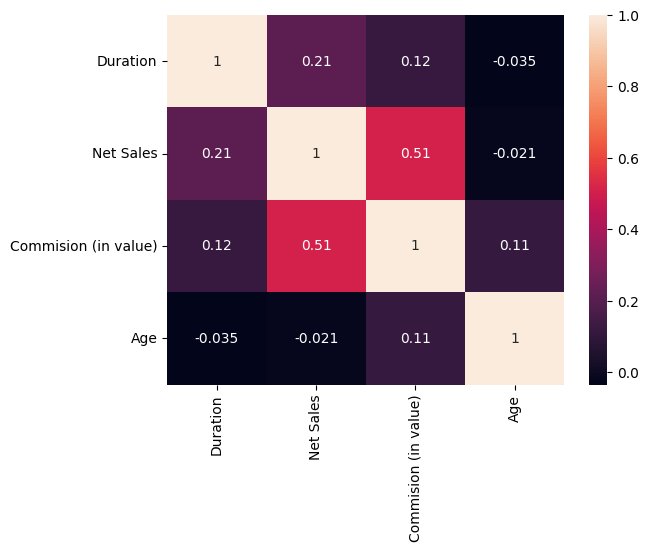

In [32]:
sns.heatmap ( df_global.corr(), annot=True);

No hay columnas redundantes, asi que no podemos eliminar ninguna.

-----------------


Vamos a explorar las columnas categóricas.

In [33]:
df.describe(include='O')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
count,55284,55284,55284,55284,55284,55284,16959
unique,16,2,2,26,2,149,2
top,EPX,Travel Agency,Online,Cancellation Plan,No,SINGAPORE,M
freq,28956,39098,54232,15308,54363,11539,8558


Teniamos pendiente gestionar los nulos de Gender.

In [34]:
df_global.Gender.isnull().sum()

19087

In [35]:
porcentaje_nulos=df_global.Gender.isnull().sum()/len(df_global.Gender)*100
porcentaje_nulos

68.18246767164392

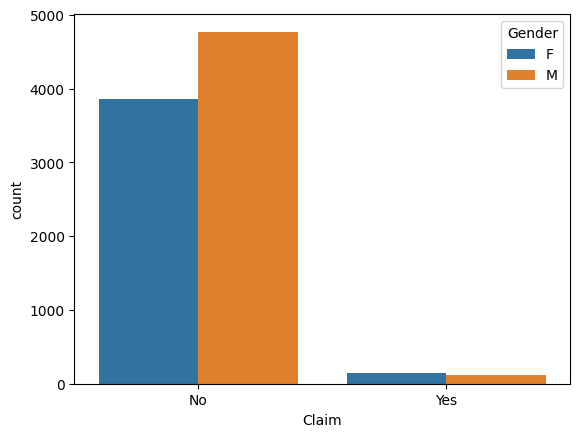

In [36]:
sns.countplot(data=df_global, x='Claim', hue='Gender');

Hemos visto que hay un 68% de nulos en la columna pero a través de la gráfica vemos que en género no es determinante para reclamar el seguro, asi que optamos por eliminar esta variable.

In [37]:
df_global.drop(['Gender'], axis=1, inplace=True)

In [38]:
df_global.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
26,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,29,UNITED STATES,9.90,5.94,33
27,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,28,UNITED STATES,9.90,5.94,33


### Guardamos los dos df.

Aquí el df con reclamantes y no reclamantes:

In [39]:
df_global.to_csv ('datos/df_global.csv')

Aquí guardamos los que solo son reclamantes (1):

In [40]:
df3.to_csv('datos/df_claimed.csv')